In [1]:
import pandas as pd 
struct_distances = pd.read_csv("../../../comparison/tmalign/all_distances.csv")

In [2]:
struct_distances["chain1"] = struct_distances["chain1"].apply(lambda s: s.split("/")[-1].split(".")[0])
struct_distances["chain2"] = struct_distances["chain2"].apply(lambda s: s.split(".")[0])
struct_distances

,Unnamed: 0,chain1,chain2,rmsd,moving_tm_score,fixed_tm_score
0,0,1xmkA00,4co8A00,3.08,0.55923,0.47596
1,1,1xmkA00,3iwfB00,3.35,0.48692,0.45279
2,2,1xmkA00,1r7jA00,2.60,0.62223,0.56055
3,3,1xmkA00,2fq3A00,2.32,0.54607,0.51675
4,4,1xmkA00,5it3A00,2.32,0.55082,0.52018
...,...,...,...,...,...,...
6239273,1,2a9dA01,2biiA01,1.54,0.85861,0.89345
6239274,2,2a9dA01,1xdyG00,2.59,0.63389,0.60041
6239275,0,2blfA01,2biiA01,2.11,0.78134,0.85279
6239276,1,2blfA01,1xdyG00,3.17,0.63448,0.63002


In [3]:
dist_func = "cosine" #"euclidean"
UMAP = True
if UMAP:
    raw_latent = pd.read_hdf("COSINESIM-cosine-umap-all_latent.h5", "table")
else:
    raw_latent = pd.read_hdf("COSINESIM-cosine-umap-all.h5", "table") #"combined-umap-all_latent.h5"

In [4]:
raw_latent

,,UMAP Dimension 1,UMAP Dimension 2,ss_score,electrostatics
cathDomain,superfamily,,,,
1xmkA00,1.10.10.10,8.679561,4.227139,0.194777,0.694795
4co8A00,1.10.10.10,11.389152,6.348573,0.253359,0.633395
3iwfB00,1.10.10.10,11.294485,6.322081,0.036670,0.830176
1r7jA00,1.10.10.10,8.075078,3.798686,0.127898,0.807794
2fq3A00,1.10.10.10,11.302270,6.116488,0.000000,0.779402
...,...,...,...,...,...
2a9dA01,3.90.420.10,-10.333757,14.835456,0.600000,0.563737
2blfA01,3.90.420.10,-9.465616,14.917025,0.665815,0.386514
5k3xB01,3.90.420.10,-12.123940,11.602208,0.574274,0.617847


In [5]:
if raw_latent.shape[1]==4:
    raw_latent = raw_latent.drop(columns=["ss_score", "electrostatics"])

In [6]:
raw_latent

,,UMAP Dimension 1,UMAP Dimension 2
cathDomain,superfamily,,
1xmkA00,1.10.10.10,8.679561,4.227139
4co8A00,1.10.10.10,11.389152,6.348573
3iwfB00,1.10.10.10,11.294485,6.322081
1r7jA00,1.10.10.10,8.075078,3.798686
2fq3A00,1.10.10.10,11.302270,6.116488
...,...,...,...
2a9dA01,3.90.420.10,-10.333757,14.835456
2blfA01,3.90.420.10,-9.465616,14.917025
5k3xB01,3.90.420.10,-12.123940,11.602208


In [7]:
from sklearn.metrics import pairwise_distances

In [8]:
raw_latent_dist = pairwise_distances(raw_latent.values, metric=dist_func)

In [9]:
domains = raw_latent.reset_index().cathDomain
raw_latent_dist_pd = pd.DataFrame(raw_latent_dist, index=domains, columns=domains)

In [10]:
import numpy as np
raw_latent_dist_masked = raw_latent_dist.copy()
raw_latent_dist_masked[np.triu_indices(raw_latent_dist.shape[0], k = 1)] = -1
raw_latent_dist_masked

array([[ 0.0000000e+00, -1.0000000e+00, -1.0000000e+00, ...,
        -1.0000000e+00, -1.0000000e+00, -1.0000000e+00],
       [ 1.5293360e-03,  0.0000000e+00, -1.0000000e+00, ...,
        -1.0000000e+00, -1.0000000e+00, -1.0000000e+00],
       [ 1.6288161e-03,  1.4901161e-06,  0.0000000e+00, ...,
        -1.0000000e+00, -1.0000000e+00, -1.0000000e+00],
       ...,
       [ 1.3468146e+00,  1.2944311e+00,  1.2927359e+00, ...,
         0.0000000e+00, -1.0000000e+00, -1.0000000e+00],
       [ 1.2982862e+00,  1.2450624e+00,  1.2433428e+00, ...,
         1.3144612e-03,  0.0000000e+00, -1.0000000e+00],
       [ 1.1751966e+00,  1.1204993e+00,  1.1187388e+00, ...,
         1.5812218e-02,  8.0273151e-03,  0.0000000e+00]], dtype=float32)

In [11]:
raw_latent_dist_masked_pd = pd.DataFrame(raw_latent_dist_masked, index=domains, columns=domains)

In [12]:
raw_latent_dist_masked_pd = raw_latent_dist_masked_pd.reset_index().melt(id_vars="cathDomain", var_name="chain2", value_name="Embedding Distance").rename(columns={"cathDomain":"chain1"})

In [13]:
raw_latent_dist_masked_pd2 = raw_latent_dist_masked_pd[raw_latent_dist_masked_pd["Embedding Distance"]>0]

In [14]:
raw_latent_dist_masked_pd3 = pd.merge(raw_latent_dist_masked_pd2, struct_distances, on=["chain1", "chain2"])

In [15]:
struct_distances2 = struct_distances.copy()
struct_distances2 = struct_distances2.rename(columns={"chain1":"chain2_"}).rename(
    columns={"chain2":"chain1", "chain2_":"chain2"})

In [16]:
raw_latent_dist_masked_pd3_5 = pd.merge(raw_latent_dist_masked_pd2, struct_distances2, on=["chain1", "chain2"])

In [17]:
raw_latent_dist_masked_pd3 = pd.concat((raw_latent_dist_masked_pd3, raw_latent_dist_masked_pd3_5))

In [18]:
raw_latent_dist_masked_pd3

,chain1,chain2,Embedding Distance,Unnamed: 0,rmsd,moving_tm_score,fixed_tm_score
0,5lohA02,4nfnA02,0.002033,0,2.87,0.76997,0.67520
1,5lohA02,4aaaA02,0.000031,1,2.03,0.83242,0.73922
2,5lohA02,2izrA02,0.000677,2,2.92,0.77170,0.64648
3,4i92A02,2a2aA02,0.000487,0,3.10,0.67950,0.63879
4,5lohA02,2a2aA02,0.000477,4,2.57,0.82089,0.70626
...,...,...,...,...,...,...,...
5611392,2biiA01,2a9dA01,0.010887,1,1.54,0.85861,0.89345
5611393,1xdyG00,2a9dA01,0.000219,2,2.59,0.63389,0.60041
5611394,2biiA01,2blfA01,0.018123,0,2.11,0.78134,0.85279
5611395,1xdyG00,2blfA01,0.002040,1,3.17,0.63448,0.63002


In [19]:
def get_similarity_groupings(tm):
    if tm<=0.3:
        return "Random Similarity"
    elif 0.3<tm<=0.5:
        return "Similar Architecture"
    else:
        return "Likely Similar Fold"
    

raw_latent_dist_masked_pd3 = raw_latent_dist_masked_pd3.assign(
    Similarity=raw_latent_dist_masked_pd3.moving_tm_score.apply(get_similarity_groupings))

In [20]:
raw_latent_dist_masked_pd3 = raw_latent_dist_masked_pd3.assign(
    **{"1/(Raw Embedding Distance)^2":1/(raw_latent_dist_masked_pd3["Embedding Distance"]**2)}
)

In [21]:
raw_latent_dist_masked_pd3 = raw_latent_dist_masked_pd3.assign(
    **{"-log(Embedding Distance)":-1*raw_latent_dist_masked_pd3["Embedding Distance"].apply(np.log)}
)

2 True


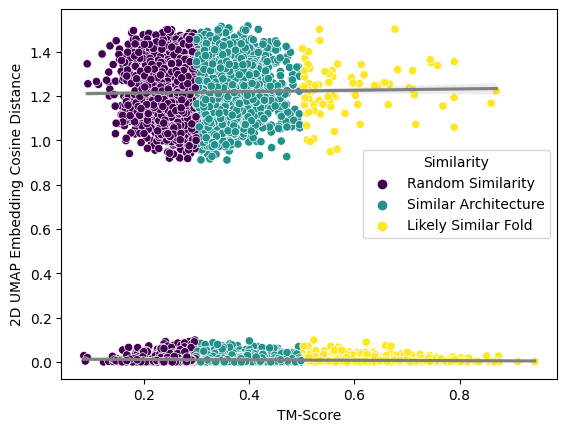

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

viridis = sns.color_palette("viridis", as_cmap=True)
color_pallete = sns.color_palette(viridis([0, 0.5, 1]))

sample = raw_latent_dist_masked_pd3.sample(10000)
fig, ax = plt.subplots()

sns.scatterplot(data=sample, 
    x="moving_tm_score", y="Embedding Distance", hue="Similarity", ax=ax, 
    hue_order=["Random Similarity", "Similar Architecture", "Likely Similar Fold"],
    palette=color_pallete)

print(raw_latent.shape[1], raw_latent.shape[1] == 2)

if raw_latent.shape[1] == 2:
    plt.ylabel("2D UMAP Embedding Cosine Distance")
    name = f"2D_UMAP_Embedding_{dist_func.title()}_Distance"
    cutoff = 0.5 if dist_func == "cosine" else 10
    sns.regplot(data=sample[sample["Embedding Distance"]<cutoff], 
        x="moving_tm_score", y="Embedding Distance",scatter=False, color="#808080")
    sns.regplot(data=sample[sample["Embedding Distance"]>=cutoff], 
        x="moving_tm_score", y="Embedding Distance",scatter=False, color="#808080")

    plt.ylabel(f"2D UMAP Embedding {dist_func.title()} Distance")

else:
    plt.ylabel(f"Raw {raw_latent.shape[1]}-Embedding {dist_func} Distance")
    name = f"Raw_{raw_latent.shape[1]}-Embedding_{dist_func}_Distance"

    sns.regplot(data=sample, 
        x="moving_tm_score", y="Embedding Distance",scatter=False, color="#808080")#, hue="Similarity")
    
plt.xlabel("TM-Score")

plt.savefig(f"Combined_Distance_plot_{name}.pdf", dpi=600, bbox_inches="tight")
plt.savefig(f"Combined_Distance_plot_{name}.pdf", dpi=600, bbox_inches="tight")

<Axes: xlabel='Embedding Distance', ylabel='Density'>

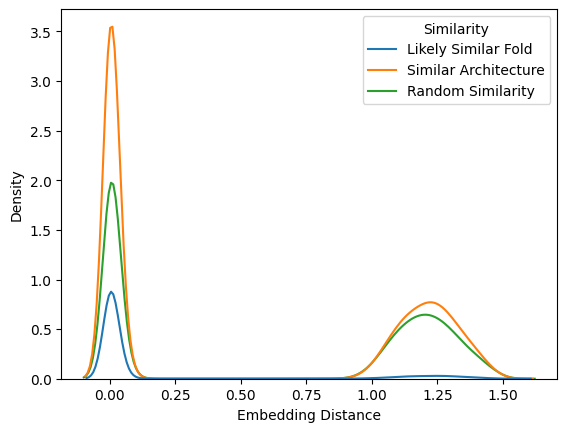

In [23]:
sns.kdeplot(data=raw_latent_dist_masked_pd3, x="Embedding Distance", hue="Similarity")

In [24]:
sfams = raw_latent.index.to_frame().reset_index(drop=True)

In [25]:
raw_latent_dist_masked_pd4 = pd.merge(
    raw_latent_dist_masked_pd3,
    sfams.rename(columns={"cathDomain":"chain1", "superfamily":"sfam1"}),
    on="chain1"
)

In [26]:
raw_latent_dist_masked_pd4 = pd.merge(
    raw_latent_dist_masked_pd4,
    sfams.rename(columns={"cathDomain":"chain2", "superfamily":"sfam2"}),
    on="chain2"
)

In [27]:
raw_latent_dist_masked_pd4

,chain1,chain2,Embedding Distance,Unnamed: 0,rmsd,moving_tm_score,fixed_tm_score,Similarity,1/(Raw Embedding Distance)^2,-log(Embedding Distance),sfam1,sfam2
0,5lohA02,4nfnA02,2.032578e-03,0,2.87,0.76997,0.67520,Likely Similar Fold,2.420503e+05,6.198451,1.10.510.10,1.10.510.10
1,4i92A02,4nfnA02,2.053261e-03,2,3.52,0.64465,0.67529,Likely Similar Fold,2.371984e+05,6.188326,1.10.510.10,1.10.510.10
2,4g3fA02,4nfnA02,1.531839e-05,6,2.74,0.74475,0.78984,Likely Similar Fold,4.261608e+09,11.086456,1.10.510.10,1.10.510.10
3,4wnoA02,4nfnA02,5.960464e-08,7,2.99,0.70287,0.76576,Likely Similar Fold,2.814750e+14,16.635532,1.10.510.10,1.10.510.10
4,5i4nA02,4nfnA02,1.331568e-04,10,3.49,0.64334,0.70501,Likely Similar Fold,5.639927e+07,8.923984,1.10.510.10,1.10.510.10
...,...,...,...,...,...,...,...,...,...,...,...,...
5611860,2biiA01,2a9dA01,1.088732e-02,1,1.54,0.85861,0.89345,Likely Similar Fold,8.436409e+03,4.520156,3.90.420.10,3.90.420.10
5611861,1xdyG00,2a9dA01,2.185106e-04,2,2.59,0.63389,0.60041,Likely Similar Fold,2.094377e+07,8.428676,3.90.420.10,3.90.420.10
5611862,2biiA01,2blfA01,1.812261e-02,0,2.11,0.78134,0.85279,Likely Similar Fold,3.044797e+03,4.010595,3.90.420.10,3.90.420.10
5611863,1xdyG00,2blfA01,2.039611e-03,1,3.17,0.63448,0.63002,Likely Similar Fold,2.403838e+05,6.194996,3.90.420.10,3.90.420.10


In [28]:
#raw_latent_dist_masked_pd4_b

In [29]:
raw_latent_dist_masked_pd4 = raw_latent_dist_masked_pd4.assign(
    **{"SH3:SH3":raw_latent_dist_masked_pd4.apply(
        lambda x: (x.sfam1=="2.30.30.100" and x.sfam1==x.sfam1), axis=1),
       "SH3:notSH3":raw_latent_dist_masked_pd4.apply(
        lambda x: ((x.sfam1=="2.30.30.100" and x.sfam1!=x.sfam2) or (x.sfam2=="2.30.30.100" and x.sfam1!=x.sfam2)), axis=1),
    }
)

In [30]:
raw_latent_dist_masked_pd4

,chain1,chain2,Embedding Distance,Unnamed: 0,rmsd,moving_tm_score,fixed_tm_score,Similarity,1/(Raw Embedding Distance)^2,-log(Embedding Distance),sfam1,sfam2,SH3:SH3,SH3:notSH3
0,5lohA02,4nfnA02,2.032578e-03,0,2.87,0.76997,0.67520,Likely Similar Fold,2.420503e+05,6.198451,1.10.510.10,1.10.510.10,False,False
1,4i92A02,4nfnA02,2.053261e-03,2,3.52,0.64465,0.67529,Likely Similar Fold,2.371984e+05,6.188326,1.10.510.10,1.10.510.10,False,False
2,4g3fA02,4nfnA02,1.531839e-05,6,2.74,0.74475,0.78984,Likely Similar Fold,4.261608e+09,11.086456,1.10.510.10,1.10.510.10,False,False
3,4wnoA02,4nfnA02,5.960464e-08,7,2.99,0.70287,0.76576,Likely Similar Fold,2.814750e+14,16.635532,1.10.510.10,1.10.510.10,False,False
4,5i4nA02,4nfnA02,1.331568e-04,10,3.49,0.64334,0.70501,Likely Similar Fold,5.639927e+07,8.923984,1.10.510.10,1.10.510.10,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611860,2biiA01,2a9dA01,1.088732e-02,1,1.54,0.85861,0.89345,Likely Similar Fold,8.436409e+03,4.520156,3.90.420.10,3.90.420.10,False,False
5611861,1xdyG00,2a9dA01,2.185106e-04,2,2.59,0.63389,0.60041,Likely Similar Fold,2.094377e+07,8.428676,3.90.420.10,3.90.420.10,False,False
5611862,2biiA01,2blfA01,1.812261e-02,0,2.11,0.78134,0.85279,Likely Similar Fold,3.044797e+03,4.010595,3.90.420.10,3.90.420.10,False,False
5611863,1xdyG00,2blfA01,2.039611e-03,1,3.17,0.63448,0.63002,Likely Similar Fold,2.403838e+05,6.194996,3.90.420.10,3.90.420.10,False,False


Text(0.5, 0, 'TM-Score')

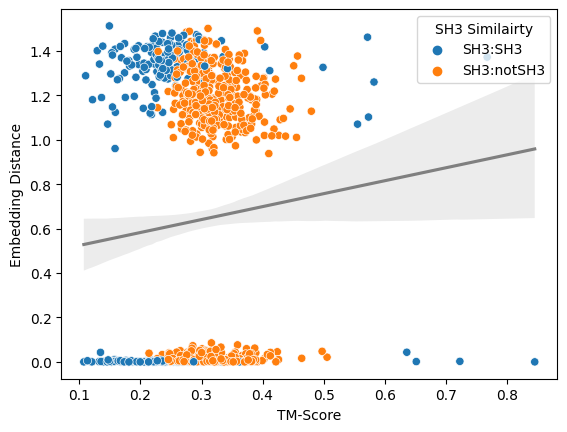

In [31]:
sh3 = raw_latent_dist_masked_pd4[
    (raw_latent_dist_masked_pd4["SH3:SH3"]==True)|\
    (raw_latent_dist_masked_pd4["SH3:notSH3"]==True)]
sh3 = sh3.assign(**{"SH3 Similairty": sh3.apply(lambda x: "SH3:SH3" if x["SH3:SH3"] else "SH3:notSH3", axis=1)})
sample_sh3 = sh3.sample(1000)

fig, ax = plt.subplots()

sns.regplot(data=sample_sh3, 
    x="moving_tm_score", y="Embedding Distance",scatter=False, color="#808080")#, hue="SH3 Similairty")
sns.scatterplot(data=sample_sh3, 
    x="moving_tm_score", y="Embedding Distance", hue="SH3 Similairty", ax=ax)
plt.xlabel("TM-Score")